In [7]:
# % matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = "retina"

df = pd.read_csv('handled_ryf_data.csv',encoding = 'utf8')

#过滤掉1，2s就离开的用户
df = df[df['visit_portal_time'] > 2]
total_count = len(df)
print(total_count)

215


# 页面访问时间

* 只访问了React广告页的用户(48.7%)，平均停留12s
* 访问了多个课程页面的用户(20.4%)，平均停留25s

count    133.000000
mean      20.796992
std       20.077788
min        3.000000
25%        5.000000
50%       12.000000
75%       34.000000
max       79.000000
Name: visit_portal_time, dtype: float64

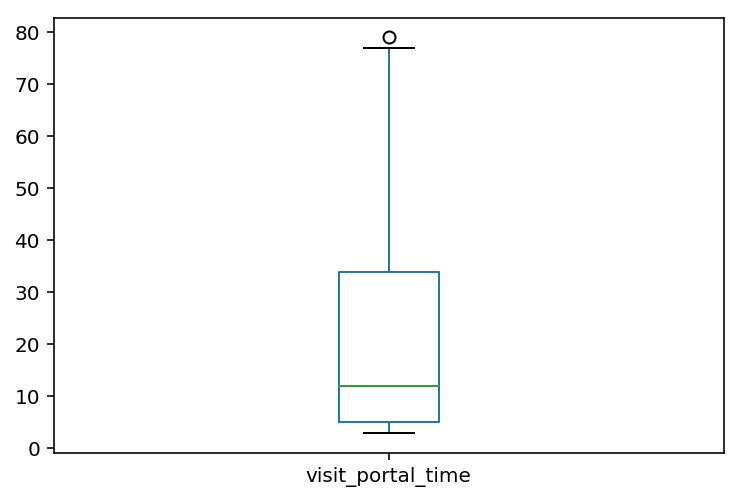

In [8]:
#评估只访问了一个页面的用户数据，过滤掉点一下就离开页面的人
df_new = df[(df['visit_portal_time'] < 80) & (df['total_visit_page_one_time'] == 1)]
df_new['visit_portal_time'].plot(kind='box')
df_new['visit_portal_time'].describe()

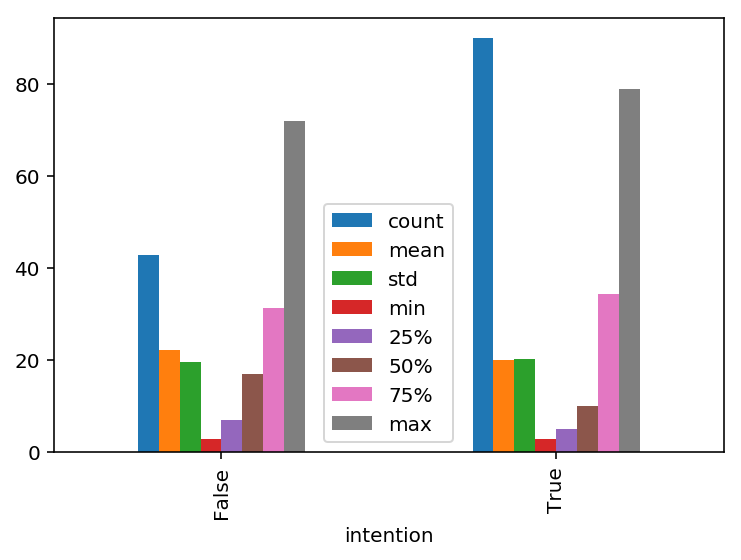

In [22]:
df_new.groupby('intention')['visit_portal_time'].describe()
df_new.groupby('intention')['visit_portal_time'].describe().plot(kind='bar')


* 可以看到关注前端内容的用户，对广告更无感，平均访问时长偏低。

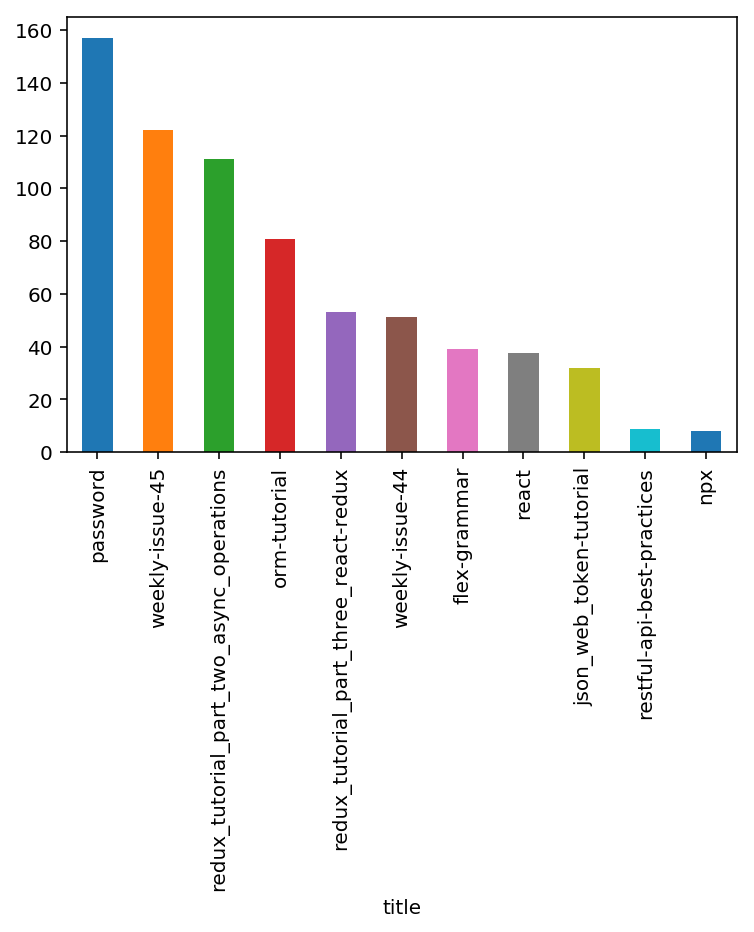

In [52]:
grouped = df.groupby(['title'])
filter_gp = grouped.filter(lambda x: x['Unnamed: 0'].count() >= 5).groupby('title')
filter_gp['visit_portal_time'].mean().sort_values(ascending=False).plot(kind='bar')

0.26046511627906976

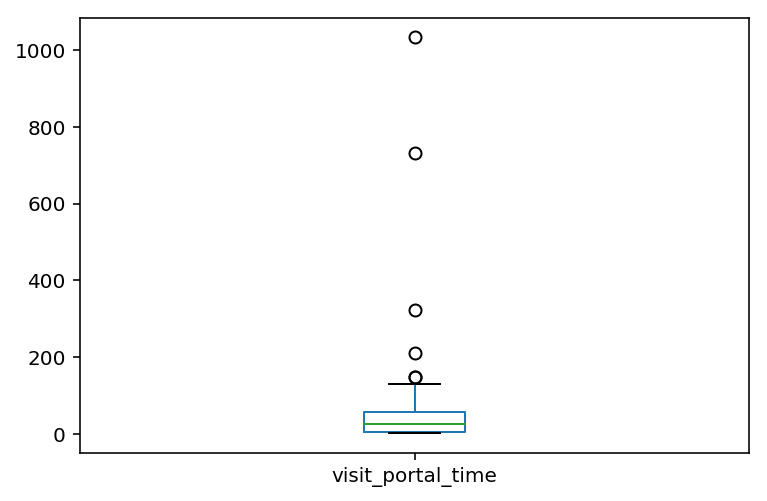

In [12]:
#评估只访问了多个页面的用户数据，过滤掉点一下就离开页面的人
df_new = df[(df['total_visit_page_one_time'] > 1)]
df_new['visit_portal_time'].plot(kind='box')
df_new['visit_portal_time'].describe()

len(df_new)/total_count

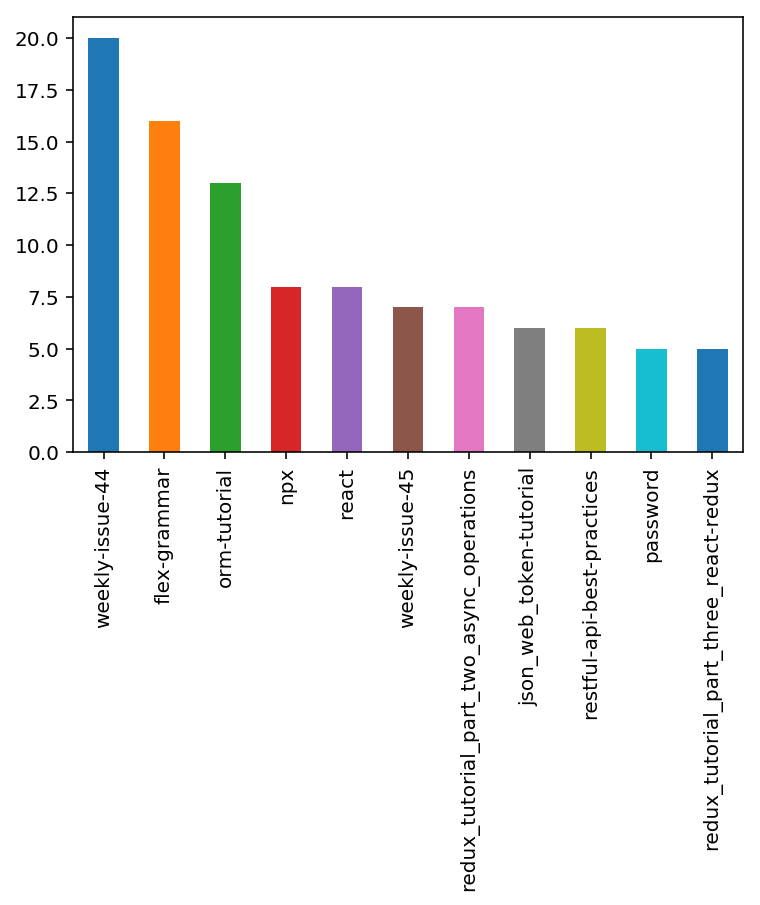

In [48]:
# 将总点击量大于5的文章展示在图中
grouped = df.groupby(['title'])
filter_gp = grouped.filter(lambda x: x['Unnamed: 0'].count() >= 5)
filter_gp['title'].value_counts().plot(kind='bar')

# 按照地域不同，得到不同地域访问页面时间信息

In [48]:
grouped = df.groupby('domain')['visit_portal_time'].describe()[['count','mean','min','25%','50%','75%','max']].reset_index()
grouped.sort_values('count', ascending=False)

,domain,count,mean,min,25%,50%,75%,max
8,北京,52.0,26.730769,0.0,3.00,6.5,28.75,402.0
1,上海,30.0,56.200000,0.0,2.50,21.5,49.00,733.0
26,杭州,29.0,25.379310,0.0,3.00,11.0,35.00,148.0
32,深圳,22.0,32.000000,0.0,5.25,16.5,42.00,157.0
21,广州,16.0,82.375000,0.0,3.00,5.5,41.50,1033.0
6,其他,13.0,92.307692,0.0,3.00,25.0,79.00,437.0
24,成都,12.0,38.916667,0.0,3.00,21.5,65.25,146.0
45,郑州,8.0,32.750000,0.0,0.00,1.0,15.50,212.0
9,南京,6.0,128.833333,5.0,5.00,8.5,22.50,720.0
42,西安,6.0,54.000000,1.0,16.25,43.5,76.75,141.0


In [35]:

df.groupby('domain')['visit_portal_time'].count().sort_values(ascending=False)#mean().sort_values(ascending=False)
grouped = df.groupby('domain')['visit_portal_time'].aggregate([np.mean, 'count']).reset_index()
grouped.sort_values('count', ascending=False)

,domain,mean,count
8,北京,26.730769,52
1,上海,56.200000,30
26,杭州,25.379310,29
32,深圳,32.000000,22
21,广州,82.375000,16
6,其他,92.307692,13
24,成都,38.916667,12
45,郑州,32.750000,8
9,南京,128.833333,6
42,西安,54.000000,6


# 处理用户停留页面的时间，并且按照一定区间进行聚合

* 值为未知，则写为0；否则去掉数字中的“s”

In [178]:
def transform(row):
    duration_str = row['duration_time']
    duration_time = 0
    first_letter = duration_str[0]
    if first_letter.isdigit():
        duration_time = int(duration_str[:-1])
        
    row['duration_time'] = duration_time
    return row

df = df.apply(transform, axis=1)

In [167]:
# df = df.sort('duration_time')
df.groupby(['duration_time']).groups

{0: Int64Index([  4,   9,  26,  36,  38,  39,  40,  41,  42,  43,  46,  61,  63,
              90,  94, 105, 109, 111, 113, 132, 144, 150, 151, 154, 164, 168,
             169],
            dtype='int64'),
 1: Int64Index([3, 7, 84, 88, 98, 127, 145, 190, 194], dtype='int64'),
 2: Int64Index([13, 14, 34, 35, 75, 92, 108, 121, 149, 160, 187], dtype='int64'),
 3: Int64Index([16, 31, 44, 81, 89, 123, 126, 129, 162], dtype='int64'),
 4: Int64Index([2, 15, 59, 87, 172], dtype='int64'),
 5: Int64Index([6, 30, 68, 72, 83, 85, 103, 115, 116, 122, 140, 171, 174, 182,
             185],
            dtype='int64'),
 6: Int64Index([24, 37, 47, 86, 95, 161], dtype='int64'),
 7: Int64Index([18, 173], dtype='int64'),
 8: Int64Index([19, 33, 60, 70, 96, 97, 139], dtype='int64'),
 9: Int64Index([27], dtype='int64'),
 10: Int64Index([118, 131, 142, 157], dtype='int64'),
 11: Int64Index([20, 66, 179], dtype='int64'),
 12: Int64Index([141], dtype='int64'),
 13: Int64Index([55, 181], dtype='int64'),
 14: In